In [1]:
import numpy as np
import pandas as pd

In [2]:
df =  pd.read_csv('clean_housing.csv')
df

,Unnamed: 0,Global_reactive_power,Voltage,Global_intensity,Date_day,Date_month,hour,minute,Total_sub_metering
0,839936,0.000,241.71,0.8,22.0,7.0,0,20,2.0
1,1279470,0.242,243.45,2.0,23.0,5.0,5,54,2.0
2,994966,0.000,242.51,4.0,11.0,6.0,16,10,0.0
3,1739613,0.192,242.47,1.6,4.0,7.0,18,57,2.0
4,1399051,0.000,243.32,0.6,14.0,8.0,6,55,1.0
...,...,...,...,...,...,...,...,...,...
49995,743275,0.196,235.44,13.9,15.0,5.0,21,19,29.0
49996,1983295,0.070,243.18,1.6,24.0,9.0,0,19,2.0
49997,1638498,0.238,244.96,2.4,27.0,1.0,13,42,1.0
49998,907437,0.196,238.03,6.0,9.0,6.0,21,21,18.0


In [3]:
df.duplicated().sum()

0

In [4]:
df.shape

(50000, 9)

In [5]:
df.isnull().sum()

Unnamed: 0               0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Date_day                 0
Date_month               0
hour                     0
minute                   0
Total_sub_metering       0
dtype: int64

In [6]:
df.dtypes

Unnamed: 0                 int64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Date_day                 float64
Date_month               float64
hour                       int64
minute                     int64
Total_sub_metering       float64
dtype: object

In [7]:
X = df.drop('Total_sub_metering',axis = 1)
y = df['Total_sub_metering']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=100)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler =  StandardScaler()

In [12]:
 scaler.fit(X_train)

StandardScaler()

In [13]:
X_train_tf = scaler.transform(X_train)
X_test_tf = scaler.transform(X_test)

# Modeling

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rf_reg = RandomForestRegressor()

In [17]:
rf_reg.fit(X_train_tf,y_train)

RandomForestRegressor()

In [18]:
y_pred = rf_reg.predict(X_test_tf)

In [19]:
y_pred

array([ 0.59, 17.72,  0.91, ...,  1.9 , 20.32, 11.93])

In [20]:
## Assumption

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
rf_reg_mse = mean_squared_error(y_test,y_pred)
print("Mean square Error",rf_reg_mse)

Mean square Error 19.839055605186683


In [23]:
residual = y_test - y_pred
residual

4253      0.41
30076    -0.72
48047     0.09
1666      0.48
30740    -1.78
         ...  
9701      0.89
1304     -1.04
49735     0.10
33756    10.68
31171   -10.93
Name: Total_sub_metering, Length: 5000, dtype: float64

In [24]:
import seaborn as sns

<AxesSubplot:xlabel='Total_sub_metering', ylabel='Density'>

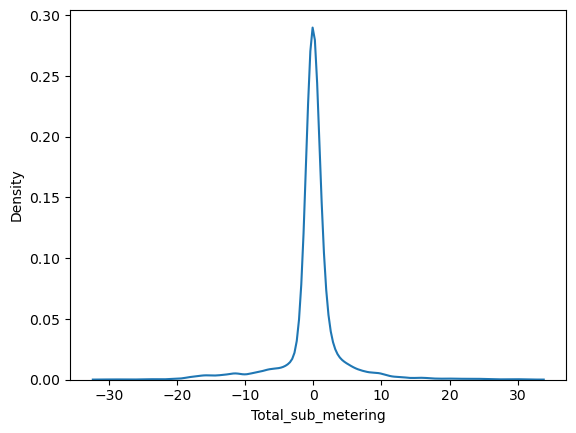

In [25]:
sns.kdeplot(residual)

In [26]:
from sklearn.metrics import r2_score

In [27]:
rf_r2_score = r2_score(y_test,y_pred)
rf_r2_score

0.7967720749329625

# Hyperparameter tunning

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
random_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [90,100,115,120]
}

In [32]:
rf_ht = RandomForestRegressor()

In [33]:
rf_random = RandomizedSearchCV(estimator = rf_ht, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [34]:
rf_random.fit(X_train_tf,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [90, 100, 115, 120]},
                   random_state=42, verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 115,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [37]:
Rf_model_with_best_params = RandomForestRegressor(
    n_estimators= 115,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features = 'sqrt',
 max_depth = 30,
 bootstrap = False
)

In [39]:
Rf_model_with_best_params.fit(X_train_tf,y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=115)

In [40]:
y_pred_ht = Rf_model_with_best_params.predict(X_test_tf)

In [43]:
# Assumption

In [44]:
rf_reg_mse1 = mean_squared_error(y_test,y_pred_ht)
print("Mean square Error",rf_reg_mse)

Mean square Error 19.839055605186683


In [45]:
residual1 = y_test - y_pred_ht
residual1

4253      0.366201
30076    -0.363768
48047    -0.046014
1666      0.520004
30740    -1.086957
           ...    
9701      0.600000
1304     -0.886957
49735     0.121739
33756    11.886957
31171   -10.764150
Name: Total_sub_metering, Length: 5000, dtype: float64

<AxesSubplot:xlabel='Total_sub_metering', ylabel='Density'>

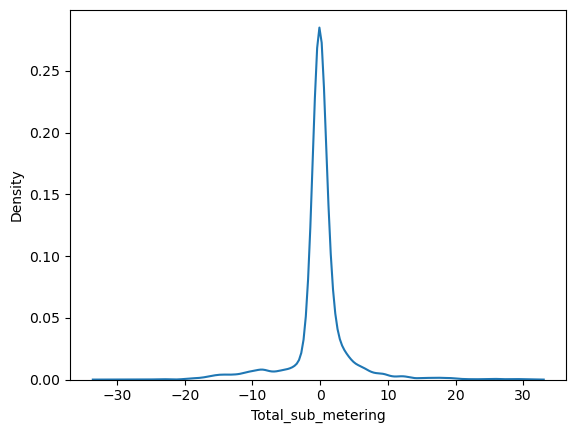

In [46]:
sns.kdeplot(residual1)

In [42]:
r2_score_ht = r2_score(y_test,y_pred_ht)
r2_score_ht

0.8022646999573584